## ASTROGAM constraints

In [1]:
import numpy as np
from hazma.scalar_mediator import ScalarMediator
from hazma.gamma_ray_limits.gamma_ray_limit_parameters import gc_target, gc_bg_model, A_eff_e_astrogam, energy_res_e_astrogam, T_obs_e_astrogam

sm = ScalarMediator(mx=1., ms=1000., gsxx=1., gsff=1., gsGG=1., gsFF=1.)
mxs = np.linspace(70., 250., 10)

sm_lims_e_astrogam = sm.unbinned_limits(mxs, target_params=gc_target, bg_model=gc_bg_model,
                                        A_eff=A_eff_e_astrogam, energy_res=energy_res_e_astrogam, T_obs=T_obs_e_astrogam)

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/gamma_ray_limits/compute_limits.py:44: RuntimeWarning: invalid value encountered in sqrt
  df_de_a = 1./np.sqrt(I_B_val) * \
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/gamma_ray_limits/compute_limits.py:46: RuntimeWarning: invalid value encountered in sqrt
  df_de_b = -1./np.sqrt(I_B_val) * \
/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/gamma_ray_limits/compute_limits.py:50: RuntimeWarning: invalid value encountered in sqrt
  return -I_S_val/np.sqrt(I_B_val), jac_val
/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


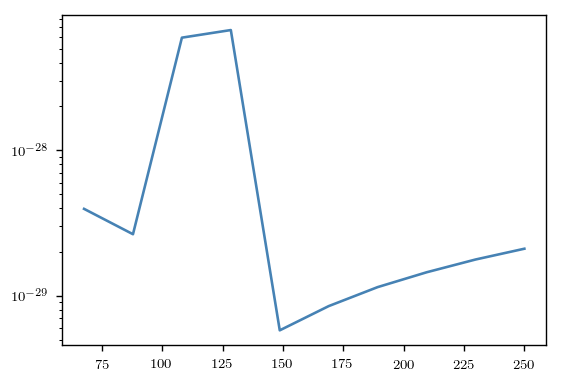

In [4]:
plt.plot(mxs, sm_lims_e_astrogam)
plt.yscale("log")

## $f_{\rm eff}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator
from hazma.pseudo_scalar_mediator import PseudoScalarMFV
from hazma.vector_mediator import VectorMediator

from hazma.parameters import neutral_pion_mass as mpi0
from hazma.cmb import f_eff_ep, f_eff_g

In [2]:
mx_min, mx_max, n_mxs = mpi0/2., 250., 10
mxs = np.linspace(mx_min, mx_max, n_mxs)

In [ ]:
s_theta = 0.5
sm_hp = ScalarMediator(mx=1., ms=1000., gsxx=1.0, gsff=s_theta, gsGG=s_theta, gsFF=-s_theta)
sm_f_effs = sm_hp.f_effs(mxs)

In [ ]:
psm = PseudoScalarMFV(mx=200., mp=1e3, gpxx=1., gpuu=1., gpdd=-1., gpll=0., gpGG=1., gpFF=7./9.)
psm_f_effs = psm.f_effs(mxs)

In [5]:
vm = VectorMediator(mx=1., mv=1000., gvxx=1., gvuu=1., gvdd=0.2, gvss=0., gvee=0., gvmumu=0.)
vm_f_effs = vm.f_effs(mxs)  # plot for benchmark couplings

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


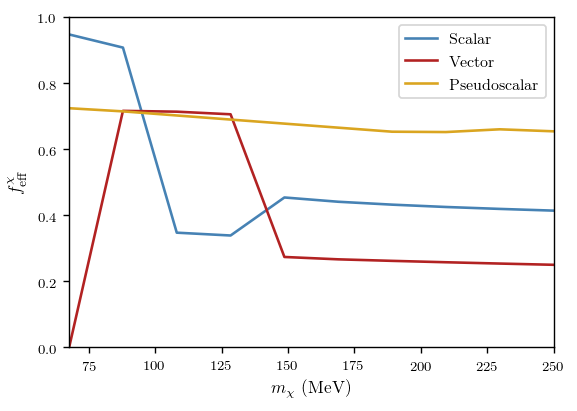

In [6]:
plt.figure(figsize=(5, 3.5))

plt.plot(mxs, sm_f_effs, label="Scalar")
plt.plot(mxs, vm_f_effs, label="Vector")
plt.plot(mxs, psm_f_effs, label="Pseudoscalar")

plt.xlim(mxs[[0, -1]])
plt.ylim(0, 1.)
plt.xlabel(r"$m_\chi$ (MeV)")
plt.ylabel(r"$f_{\mathrm{eff}}^\chi$")
plt.legend()